<a href="https://colab.research.google.com/github/subhadeepk/cse437-assignments/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







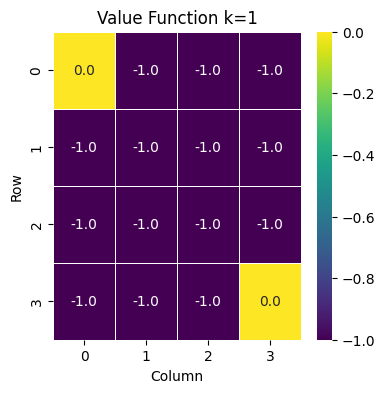

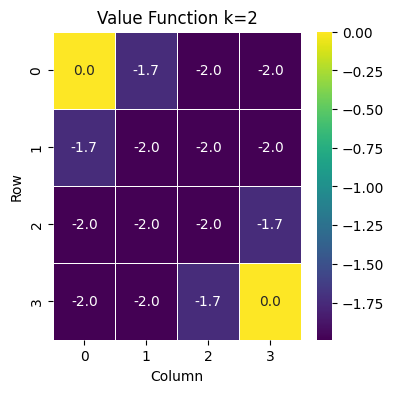

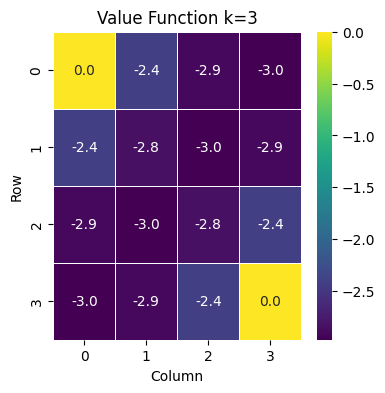

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.99  # Discount factor
V_old = np.zeros(16)

for k in range(3):
  for s in range(16):

    if s==0 or s==15:
      continue

    # Map state index to row and column
    row, col = divmod(s, 4)

    possible_actions = {
        'up': -4,
        'down': 4,
        'left': -1,
        'right': 1
    }

    new_v = 0
    # Each action has same probability
    action_prob = 0.25

    for action, move in possible_actions.items():
        next_s = s + move

        # Check for boundary conditions and calculate reward
        if (action == 'up' and row == 0) or \
           (action == 'down' and row == 3) or \
           (action == 'left' and col == 0) or \
           (action == 'right' and col == 3):
            # At boundaries, states don't change if you move out
            next_s = s

        reward = -1
        #reward is -1 for all attempted transitions

        new_v += action_prob * (reward + gamma * V_old[next_s])

    V[s] = new_v

  V_old = V.copy()




  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [26]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

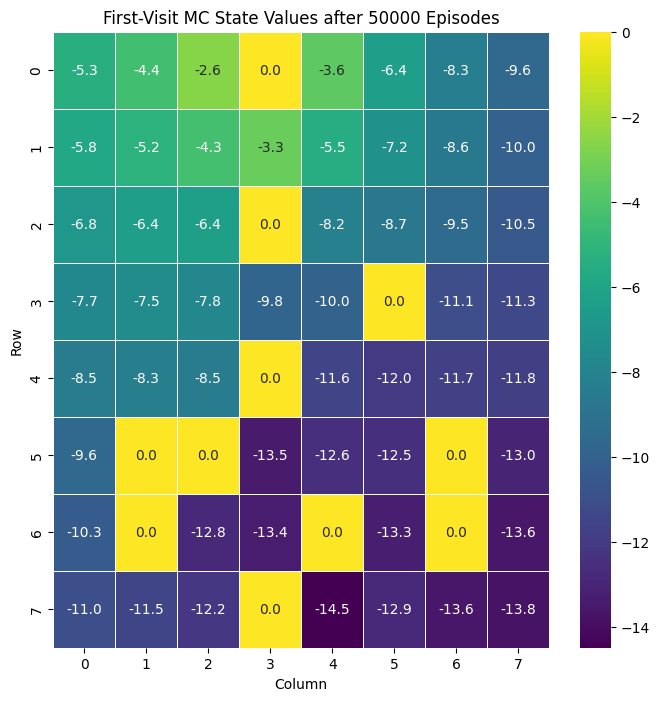

In [40]:
import gymnasium as gym
import gym_simplegrid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gamma = 0.99
START_LOC = 15
GOAL_LOC  = 3
NUM_EPISODES = 50000

# State-value estimates and visit counts
V = np.zeros(64, dtype=np.float64)
N = np.zeros(64, dtype=np.int64)

options = {"start_loc": START_LOC, "goal_loc": GOAL_LOC}
env = gym.make("SimpleGrid-8x8-v0", render_mode=None)

for ep in range(NUM_EPISODES):
    obs, info = env.reset(seed=ep+1, options=options)
    transitions = []  # (s, a, r) across this episode

    done = False
    while not done:
        a = env.action_space.sample()              # random policy
        next_obs, r, terminated, truncated, info = env.step(a)
        transitions.append((obs, a, r))
        obs = next_obs
        done = terminated or truncated

    # First-visit MC return updates
    G = 0.0
    seen = set()  # states we've already updated for this episode (first-visit)
    # Walk backwards to accumulate returns
    for t in reversed(range(len(transitions))):
        s_t, a_t, r_t = transitions[t]
        G = gamma * G + r_t
        s_idx = int(s_t)  # SimpleGrid states are scalar ints

        if s_idx not in seen:
            seen.add(s_idx)
            N[s_idx] += 1
            # Incremental mean toward G
            V[s_idx] += (G - V[s_idx]) / N[s_idx]

# env.close()

# Plot value heatmap
V_grid = V.reshape(8, 8)
plt.figure(figsize=(8, 8))
sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title(f"First-Visit MC State Values after {NUM_EPISODES} Episodes")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


In [ ]:
import gymnasium as gym
import gym_simplegrid
import numpy as np

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

# Define possible actions and their corresponding movements
possible_actions = {
    0: -8,  # Up
    1: 8,   # Down
    2: -1,  # Left
    3: 1    # Right
}

grid_size = 8

for t in range(10):
    if done:
        break

    # Find the best action
    best_action = None
    max_value = -float('inf')

    for action, move in possible_actions.items():
        next_obs = obs + move

        # Check for boundary conditions (assuming an 8x8 grid)
        row, col = divmod(obs, grid_size)
        next_row, next_col = divmod(next_obs, grid_size)

        # Determine the actual next state considering boundary conditions
        if (action == 0 and row == 0) or \
           (action == 1 and row == grid_size - 1) or \
           (action == 2 and col == 0) or \
           (action == 3 and col == grid_size - 1):
            # If moving off the grid, stay in the same state
            actual_next_obs = obs
        else:
            actual_next_obs = next_obs

        # Get the value of the next state
        next_state_value = V[actual_next_obs]

        # Check if this action leads to a better state
        if next_state_value > max_value:
            max_value = next_state_value
            best_action = action

    # Take the best action
    obs, reward, done, _, info = env.step(best_action)

    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

env.close()